**AIE21128**

**T.Harshitha**

A1. Use HMM for classification of your speech signal using STFT features.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

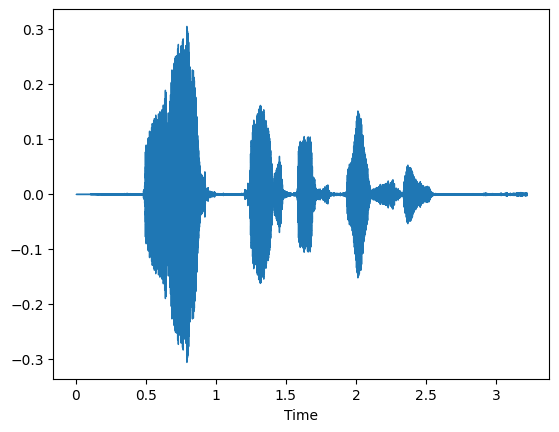

In [6]:
signal = 'Audio.wav'
time_signal, sample_rate = librosa.load(signal)
librosa.display.waveshow(time_signal)

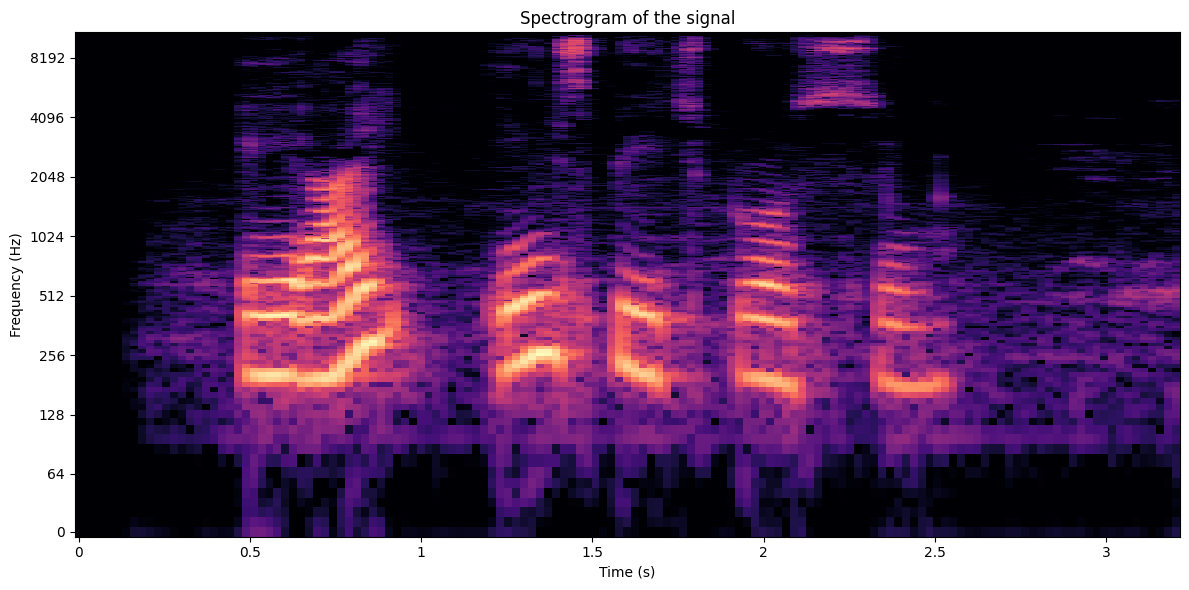

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from hmmlearn import hmm
from sklearn.model_selection import train_test_split

# Function to extract STFT features
def extract_stft_features(signal, n_fft=2048, hop_length=512):
    spectrogram = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))
    return spectrogram

# Load and preprocess data
signal = 'Audio.wav'
time_signal, sample_rate = librosa.load(signal)
spectrogram = extract_stft_features(time_signal)
plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log')
plt.title('Spectrogram of the signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


In [17]:
# Function to prepare dataset for HMM
def prepare_dataset(spectrogram, window_size=10):
    # Slide a window over the spectrogram
    X = []
    for i in range(0, spectrogram.shape[1] - window_size):
        X.append(spectrogram[:, i:i+window_size].flatten())
    return np.array(X)

# Prepare dataset
X = prepare_dataset(spectrogram)

# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Train HMM model
n_components = 2  # Number of states in HMM
model = hmm.GaussianHMM(n_components=n_components)
model.fit(X_train)

# Test the model
log_likelihood = model.score(X_test)
print("Log likelihood of the test set:", log_likelihood)

Log likelihood of the test set: 344026.0353954163
